In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Data Preprocessing 

df = pd.read_csv("C:/Data cleaning/student-mat.csv")

In [3]:
# Display initial rows and info

print("Initial DataFrame Head:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nDataFrame Info:")
df.info()

Initial DataFrame Head:
| school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3   |
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6                                                                                            |
| GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6                                                                                              |
| GP;"F";15;"U";"LE3";"T";1;1;"at_home";

In [4]:
# Check for missing values

print("\nMissing Values:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Missing Values:
|                                                                                                                                                                                                                                     | 0   |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----|
| school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3 | 0   |


In [5]:
# Explore unique values for object columns

print("\nUnique Values of Categorical Columns:")
for column in df.columns:
    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Column '{column}': Unique values - {unique_values}")


Unique Values of Categorical Columns:
Column 'school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3': Unique values - ['GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6'
 'GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6'
 'GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;3;"yes";"no";"yes";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;10;"7";"8";10'
 'GP;"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;2;"15";"14";15'
 'GP;"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;4;"6";"10";

In [6]:
# Encode categorical columns
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    

In [7]:
import pandas as pd

# Load the dataset fresh
df = pd.read_csv("C:/Data cleaning/student-mat.csv", sep=';')  


print("Columns in df:\n", df.columns.tolist())


Columns in df:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [8]:
# 2 Feature Engineering & Splitting

# Reload from original df to avoid issues
df_encoded = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Check if 'G3' exists
print("'G3' in columns:", 'G3' in df_encoded.columns)

# Create binary target column
df_encoded['pass'] = (df_encoded['G3'] >= 10).astype(int)

# Drop grade columns to prevent data leakage
X = df_encoded.drop(columns=['G1', 'G2', 'G3', 'pass'])
y = df_encoded['pass']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


'G3' in columns: True


In [9]:
#3. Model Training 

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Model Training

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)



In [11]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [12]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

--- Logistic Regression Evaluation ---
Accuracy: 0.759493670886076
F1 Score: 0.8347826086956521
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.44      0.56        27
           1       0.76      0.92      0.83        52

    accuracy                           0.76        79
   macro avg       0.76      0.68      0.70        79
weighted avg       0.76      0.76      0.74        79



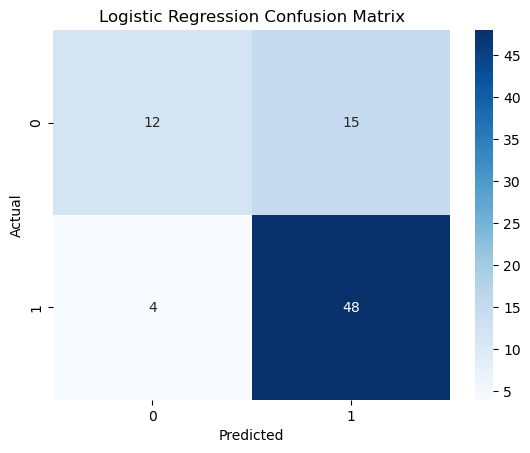

--- Random Forest Evaluation ---
Accuracy: 0.7215189873417721
F1 Score: 0.8166666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.30      0.42        27
           1       0.72      0.94      0.82        52

    accuracy                           0.72        79
   macro avg       0.72      0.62      0.62        79
weighted avg       0.72      0.72      0.68        79



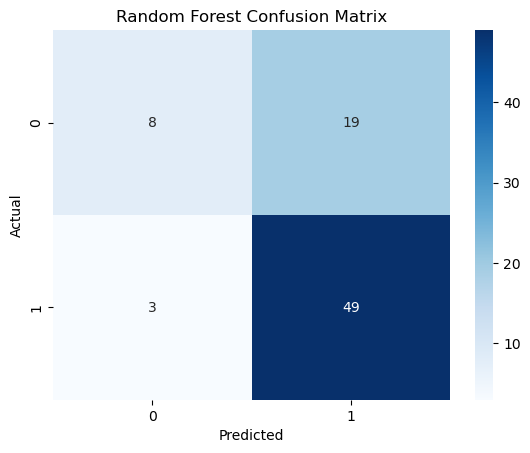

In [13]:
# 4.  Evaluation

def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)